In [146]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('loan_data_set.csv')

In [6]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [26]:
df.fillna(method = 'bfill',inplace = True)

C:\Users\siddh\AppData\Local\Temp\ipykernel_9436\4048859065.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method = 'bfill',inplace = True)


In [28]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [35]:
newdata = df.select_dtypes(include='object')

In [43]:
# newdata['Dependents'].replace('3+',3,inplace=True)

In [57]:
newdata['Dependents'] = newdata['Dependents'].astype('int64')

In [59]:
newdata['Dependents'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 614 entries, 0 to 613
Series name: Dependents
Non-Null Count  Dtype
--------------  -----
614 non-null    int64
dtypes: int64(1)
memory usage: 4.9 KB


In [61]:
from sklearn.preprocessing import LabelEncoder

In [73]:
obj = LabelEncoder()
list = newdata.columns
list

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [81]:
for x in list:
    obj.fit(newdata[[x]])
    arr = obj.fit_transform(newdata[[x]])
    newdata[x] = arr

C:\Users\siddh\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\siddh\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\siddh\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\siddh\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (

In [90]:
df[newdata.columns] = newdata

In [94]:
df.describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,306.500000,0.814332,0.651466,0.760586,0.218241,0.140065,5403.459283,1621.245798,147.350163,341.628664,0.835505,1.037459,0.687296
std,177.390811,0.389155,0.476895,1.012005,0.413389,0.347338,6109.041673,2926.248369,87.444391,65.656819,0.371027,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,153.250000,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.000000,360.000000,1.000000,0.000000,0.000000
50%,306.500000,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,128.000000,360.000000,1.000000,1.000000,1.000000
75%,459.750000,1.000000,1.000000,2.000000,0.000000,0.000000,5795.000000,2297.250000,167.750000,360.000000,1.000000,2.000000,1.000000
max,613.000000,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


In [96]:
from sklearn.preprocessing import MinMaxScaler

In [109]:
mydata = df.copy()

In [119]:
obj2 = MinMaxScaler()

In [125]:
for x in df.columns:
    obj2.fit(df[[x]])
    arr = obj2.transform(df[[x]])
    df[x] = arr

In [127]:
df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.000000,1.0,0.0,0.000000,0.0,0.0,0.070489,0.000000,0.172214,0.74359,1.0,1.0,1.0
1,0.001631,1.0,1.0,0.333333,0.0,0.0,0.054830,0.036192,0.172214,0.74359,1.0,0.0,0.0
2,0.003263,1.0,1.0,0.000000,0.0,1.0,0.035250,0.000000,0.082489,0.74359,1.0,1.0,1.0


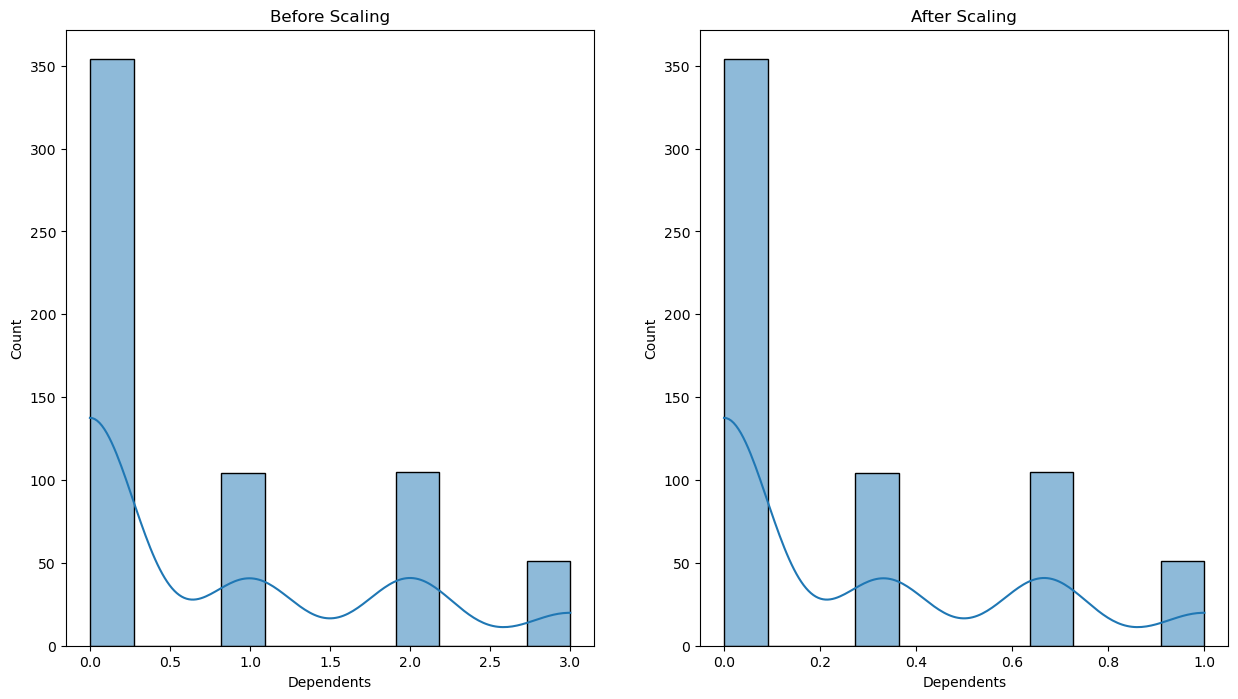

In [152]:
plt.figure(figsize = (15,8))
plt.subplot(1,2,1)
plt.title('Before Scaling')
sns.histplot(newdata['Dependents'],kde = True)

plt.subplot(1,2,2)
plt.title('After Scaling')
sns.histplot(df['Dependents'],kde = True)
plt.show()

# Function transfrom

In [155]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.000000,1.0,0.0,0.000000,0.0,0.0,0.070489,0.000000,0.172214,0.74359,1.0,1.0,1.0
1,0.001631,1.0,1.0,0.333333,0.0,0.0,0.054830,0.036192,0.172214,0.74359,1.0,0.0,0.0
2,0.003263,1.0,1.0,0.000000,0.0,1.0,0.035250,0.000000,0.082489,0.74359,1.0,1.0,1.0
3,0.004894,1.0,1.0,0.000000,1.0,0.0,0.030093,0.056592,0.160637,0.74359,1.0,1.0,1.0
4,0.006525,1.0,0.0,0.000000,0.0,0.0,0.072356,0.000000,0.191027,0.74359,1.0,1.0,1.0


In [157]:
from sklearn.preprocessing import FunctionTransformer

In [213]:
obj3 = FunctionTransformer(func= np.log1p)

In [215]:
df['CoapplicantIncome_Function'] = obj3.fit_transform(df['CoapplicantIncome'])

In [217]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,CoapplicantIncome_Function
0,0.000000,1.0,0.0,0.000000,0.0,0.0,0.070489,0.000000,0.172214,0.74359,1.0,1.0,1.0,0.000000
1,0.001631,1.0,1.0,0.333333,0.0,0.0,0.054830,0.036192,0.172214,0.74359,1.0,0.0,0.0,0.035552
2,0.003263,1.0,1.0,0.000000,0.0,1.0,0.035250,0.000000,0.082489,0.74359,1.0,1.0,1.0,0.000000
3,0.004894,1.0,1.0,0.000000,1.0,0.0,0.030093,0.056592,0.160637,0.74359,1.0,1.0,1.0,0.055048
4,0.006525,1.0,0.0,0.000000,0.0,0.0,0.072356,0.000000,0.191027,0.74359,1.0,1.0,1.0,0.000000


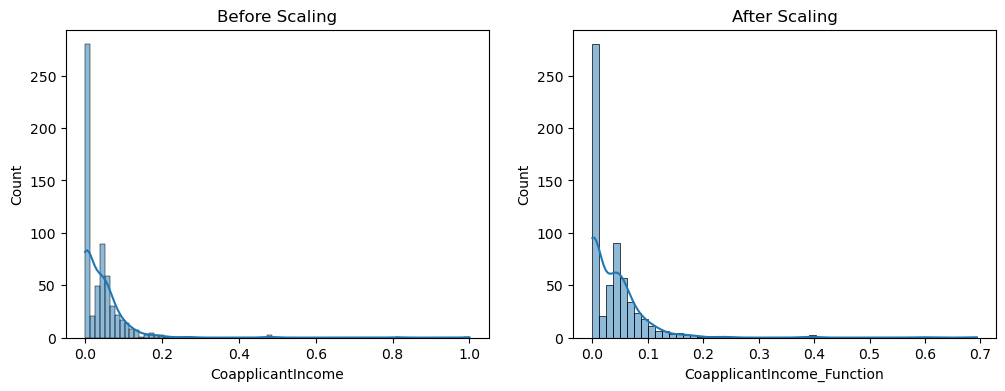

In [219]:
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
plt.title('Before Scaling')
sns.histplot(df['CoapplicantIncome'],kde = True)

plt.subplot(1,2,2)
plt.title('After Scaling')
sns.histplot(df['CoapplicantIncome_Function'],kde = True)
plt.show()